# Random example using langchain framework

In [1]:
# first get the environment variables and load them 
from dotenv import load_dotenv
load_dotenv(override=True )

True

In [2]:
import os 
os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')
print (os.environ['GOOGLE_API_KEY'][:3])

AIz


In [85]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_openai import ChatOpenAI


# create instace of openai with temperature settings - 0.0 for telling you answer without adding any creativity, it will reply only if it know 
# creative llm can have higher temperature 
boring_llm = ChatGoogleGenerativeAI(temperature=0.0, model="gemini-3-flash-preview")
creative_llm = ChatGoogleGenerativeAI(temperature=0.9, model="gemini-3-flash-preview")
image_llm = ChatOpenAI(temperature=0.7, model="gpt-4o-mini")

``` 
notice this is taking the url and api key directly - you dont need to specify explicitly

# Ask LLM to do something. 
Say I want Gemini to generate a 500 words article on GGUF format of local llms. And how is that different from model available on LM Studio

In [12]:
question = """ 
What is GGUF format in context of Local LLMs? And how it is different from GGML format or formats available in LM Studio?
""" 

In [13]:
len(question)

124

In [14]:
from langchain_core.prompts import SystemMessagePromptTemplate, HumanMessagePromptTemplate

In [15]:
# create system prompt 
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are a helpful assistant that helps people find information. You are given a question and you need to provide detailed and accurate answer is less than 500 words."
)

In [16]:
# create human prompt 
human_prompt = HumanMessagePromptTemplate.from_template("{question}", input_variables=["question"])

In [17]:
system_prompt.format()

SystemMessage(content='You are a helpful assistant that helps people find information. You are given a question and you need to provide detailed and accurate answer is less than 500 words.', additional_kwargs={}, response_metadata={})

In [18]:
human_prompt.format(question=question)

HumanMessage(content=' \nWhat is GGUF format in context of Local LLMs? And how it is different from GGML format or formats available in LM Studio?\n', additional_kwargs={}, response_metadata={})

In [19]:
from langchain_core.prompts import ChatPromptTemplate

# create the question prompt to get an article 
question_prompt = ChatPromptTemplate.from_messages([system_prompt, human_prompt])

In [21]:
question_prompt

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant that helps people find information. You are given a question and you need to provide detailed and accurate answer is less than 500 words.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])

# Using LCEL - Langchain Expression Langauge 
We will be using chain to perform - 
- Formatting 
- LLM Generation 
- Output 

The object is composed of value which appears separated by pipe character. What is the on the left of pipe is the input to what is on the right side of pipe 

In [22]:
chain_one = (
    {"question": lambda x: x["question"]}
    | question_prompt
    | creative_llm
    | {"Answer" : lambda x : x.content}
)

In [23]:
type(chain_one)

langchain_core.runnables.base.RunnableSequence

In [25]:
# store the answwer to a variable
answer = chain_one.invoke({"question": question})['Answer']

In [28]:
article = answer[0]['text']

In [30]:
import IPython

In [31]:
IPython.display.Markdown(article)

**GGUF (GPT-Generated Unified Format)** is a binary file format designed for the efficient storage and deployment of Large Language Models (LLMs). It was introduced by the `llama.cpp` team (led by Georgi Gerganov) as a successor to the older GGML format.

In the context of local LLMs, GGUF is the industry standard for running models on consumer hardware, such as MacBooks (using Apple Silicon), Windows PCs (using CPUs or NVIDIA GPUs), and Linux systems.

### Key Features of GGUF
1.  **Single-File Convenience:** Unlike many AI formats that require multiple files (weights, configuration, tokenizer), GGUF packages everything into one `.gguf` file.
2.  **Extensibility:** GGUF is "future-proof." It includes a metadata system that allows developers to add new model features without breaking compatibility with older software.
3.  **Quantization:** This is GGUF’s most important feature. It allows a massive 16-bit model (e.g., 40GB) to be compressed into 4-bit or 5-bit "quantized" versions (e.g., 8GB). This enables large models to fit into the RAM or VRAM of home computers with minimal loss in intelligence.
4.  **CPU/GPU Split:** GGUF is designed for versatility. It can run entirely on a CPU, entirely on a GPU (via CUDA or Metal), or split the workload between both if your GPU doesn't have enough memory.

### GGUF vs. GGML
**GGML** was the original format created for `llama.cpp`. However, it had a major flaw: it was "brittle." Every time the `llama.cpp` library updated or a new model architecture was released, the GGML format would break, forcing users to re-download or re-convert their models.

**GGUF improved on this by:**
*   **Including Metadata:** GGML stored only weights; GGUF stores hyperparameters (like context length) and tokenizer info.
*   **Stability:** GGUF is designed so that newer versions of software can still read older files by ignoring unknown metadata.

### GGUF in LM Studio
LM Studio is a popular graphical interface for running local LLMs. Its relationship with GGUF is central:

*   **Primary Format:** LM Studio is built on top of `llama.cpp`, which means **GGUF is the primary format it uses.** When you search for models in LM Studio, the results are almost exclusively GGUF files hosted on Hugging Face (often by creators like *Bartowski* or *MaziyarPanahi*).
*   **Other Formats:** While other formats exist—such as **GPTQ**, **AWQ**, or **EXL2**—these are generally optimized strictly for NVIDIA GPUs and require different backend engines (like AutoGPTQ).
*   **Why LM Studio prefers GGUF:** Because GGUF is the most accessible. It allows a user with an old laptop to run the same model (albeit slower) as someone with a high-end gaming PC, simply by loading the file into system RAM.

# Now lets create heading of this article

In [32]:
len(article)

2736

In [33]:
system_prompt = SystemMessagePromptTemplate.from_template(
    "You are a helpful assistant that helps people find information. You are given an article and you need to provide a suitable title for the article in less than 5 words."
)

In [34]:
human_prompt = HumanMessagePromptTemplate.from_template("""Read the article below and suggest a suitable title for it in less than 5 words.
                                                        {article}""", input_variables=["article"])

In [35]:
title_prompt = ChatPromptTemplate.from_messages([system_prompt, human_prompt])
title_prompt.format(article=article)

'System: You are a helpful assistant that helps people find information. You are given an article and you need to provide a suitable title for the article in less than 5 words.\nHuman: Read the article below and suggest a suitable title for it in less than 5 words.\n                                                        **GGUF (GPT-Generated Unified Format)** is a binary file format designed for the efficient storage and deployment of Large Language Models (LLMs). It was introduced by the `llama.cpp` team (led by Georgi Gerganov) as a successor to the older GGML format.\n\nIn the context of local LLMs, GGUF is the industry standard for running models on consumer hardware, such as MacBooks (using Apple Silicon), Windows PCs (using CPUs or NVIDIA GPUs), and Linux systems.\n\n### Key Features of GGUF\n1.  **Single-File Convenience:** Unlike many AI formats that require multiple files (weights, configuration, tokenizer), GGUF packages everything into one `.gguf` file.\n2.  **Extensibility

In [39]:
title_chain = (
    {"article": lambda x: x["article"]}
    | title_prompt
    | boring_llm
    | {"article_name": lambda x: x.content}
)

In [40]:
article_title = title_chain.invoke({"article": article})
article_title

{'article_name': [{'type': 'text',
   'text': 'GGUF File Format Explained',
   'extras': {'signature': 'EpENCo4NAXLI2nzV8R9lminoOQQC4OqDSO4fIj5tc/6wIhUcs3VYMF1gSGgIGHdS/34d6NmeZ82kaVoIjRGrL7DhKJnGGq6wv4L2ExHZQXXc4DTP+vjUSg3KWjrlgFNQ1p652O+WtZPeuVfgqmsnSZtpVMaaHAxAN61S/8hawVEsrWfRJ94hYIiDF61LGlnfb+g1L5FgyYd/dofWfUfA2V0TPeSZARRsUCGaG1zk9R/rFZk6676vlt/Cpoom6xkUXZR7lHO2neDMTaURkGuQbjZKmzkbE8OdDy5aClW+2LK0VCcYjc/ni4+X0WkrXPS2KSmiwJ9D0VyYHrrs8MghMu/l3dmgisbJ8MTBSVm6kv3dKHW55pXjZCSRIwyvcUCInSrl5/RB1xJHUfsWGVTuNwnUc+To1Lr4OHJ/i5p54xA3ao2jOP4j1AAS+zR4kmjmIr7SaGG5jaTTcGraORhvbw4YUR6dLs52GSKuo+QlOTbw/ETF6MASJ9WUIvbkWJwfjfH+NUs5DHXWKIeBEcpLF5oGBe7IFGj/JSEjwxWFoIUZoNvPDV+EkpjHpYdG6rRVd/fw3RIoKdcQ2/5t0q7IZdZ4AVOluUuDqpBBA7a3pWq43S/PmpGe3yaRId1b72DlZD1/UPgkRG0pB4OI38wgdO32+jbNwgQIiwzro5DbpUblgAzh0VAf8rnuazUpXQCilGecZIc2Mh58hELGoofEGACLCzxyZ2GDMt0kjjOxVoHdzLNj/MUXEF5MAXwiAo4N3WQquvd+P3PgxO9YBmG3nDSeH+MglJExiMGQYt9OuOkKlQurD8Lz1Oa5kgmwD2J37ownNJN1/0qPanGPmri299hXiSOtRFufPhW5YmQ1asxa9b0gh67dBIPypdELbAvI

# Now using Pydantic class lets get the title of the article

In [41]:
from pydantic import BaseModel, Field

class ArticleNameGenerator(BaseModel):
    article_name: str = Field(..., description="The name of the article.")
    feedback: int = Field(..., description="A rating from 1 to 10 indicating how well the title fits the article.")

# get the name of the article from creative llm
structured_llm = creative_llm.with_structured_output(ArticleNameGenerator)

# get the output from the creative llm in structured format
structured_chain = (
    {"article": lambda x: x["article"]}
    | title_prompt
    | structured_llm
)

In [42]:
output = structured_chain.invoke({"article": article})

In [43]:
print(output)

article_name='Understanding GGUF File Format' feedback=10


In [46]:
# get the article name 
article_name = output.article_name
article_name

'Understanding GGUF File Format'

# Generate the image from the text

In [72]:
from langchain_core.prompts import PromptTemplate

image_prompt_template = PromptTemplate(
    input_variables=["article_name"],
    template="Generate an image that represents the article titled '{article_name}'.",
)
image_prompt_template.format(article_name=output.article_name)



"Generate an image that represents the article titled 'Understanding GGUF File Format'."

In [82]:
# create llm for image generation 
image_llm_bind = image_llm.bind_tools(
    [
        {"type" : "image_generation", "quality": "medium", "size": "1024x1024"}
    ]
)

In [ ]:
# create image chain 
# wrap the prompt string into a HumanMessagePromptTemplate so LCEL accepts it as a runnable
image_chain = (

    # takes the article_name passed in invoke function and gives away the values
    {"article_name": lambda x: x["article_name"]}
    | image_prompt_template
    | image_llm_bind
)

In [ ]:
# now generate the image description using the image llm
image_description = image_chain.invoke({"article_name": article_name})

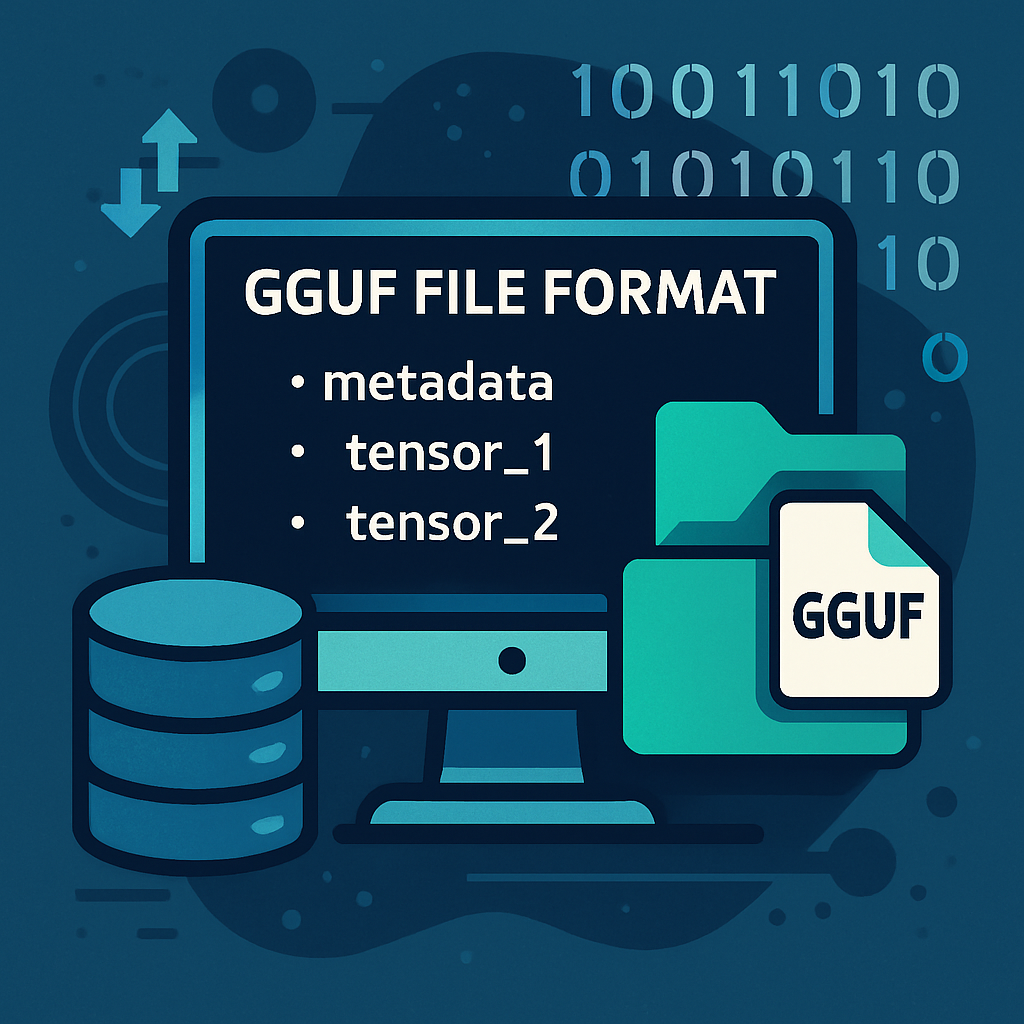

In [91]:
import base64 
IPython.display.Image(base64.b64decode(image_description.content[0]['result']))